# Practical Work 3 Part 2 SGD for Multivariable LR

### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Read your multivariable LR data into X, y variables and make shure of dimensions.

In [2]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [46]:
x=data[:,:3]
m=len(x[:,0])
y=data[:, 3].reshape(m,1)
m=len(y)
x,y

(array([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]]),
 array([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
        [141.],
        [184.],
        [152.],
        [148.],
        [192.],
        [147.],
        [183.],
        [1

### Step 1: Shuffle your data
- In this step we will also get the number of data points <b>(m)</b> and dimensions <b>n+1</b> .
- We will also add the column of ones <b>x0</b>
- Set random seed to 101.

In [47]:
X=np.concatenate((np.ones((m, 1)),x),axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [10]:
D=np.concatenate((X,y),axis=1)
D

array([[  1.,  73.,  80.,  75., 152.],
       [  1.,  93.,  88.,  93., 185.],
       [  1.,  89.,  91.,  90., 180.],
       [  1.,  96.,  98., 100., 196.],
       [  1.,  73.,  66.,  70., 142.],
       [  1.,  53.,  46.,  55., 101.],
       [  1.,  69.,  74.,  77., 149.],
       [  1.,  47.,  56.,  60., 115.],
       [  1.,  87.,  79.,  90., 175.],
       [  1.,  79.,  70.,  88., 164.],
       [  1.,  69.,  70.,  73., 141.],
       [  1.,  70.,  65.,  74., 141.],
       [  1.,  93.,  95.,  91., 184.],
       [  1.,  79.,  80.,  73., 152.],
       [  1.,  70.,  73.,  78., 148.],
       [  1.,  93.,  89.,  96., 192.],
       [  1.,  78.,  75.,  68., 147.],
       [  1.,  81.,  90.,  93., 183.],
       [  1.,  88.,  92.,  86., 177.],
       [  1.,  78.,  83.,  77., 159.],
       [  1.,  82.,  86.,  90., 177.],
       [  1.,  86.,  82.,  89., 175.],
       [  1.,  78.,  83.,  85., 175.],
       [  1.,  76.,  83.,  71., 149.],
       [  1.,  96.,  93.,  95., 192.]])

In [48]:
np.random.shuffle(D)
x_sh=D[:,:4]
y_sh=D[:, 4]
y_sh

array([152., 147., 164., 141., 196., 175., 149., 184., 148., 142., 101.,
       152., 115., 183., 177., 192., 180., 159., 175., 177., 175., 192.,
       185., 141., 149.])

Data before shuffle:
 [[  1.  73.  80.  75. 152.]
 [  1.  93.  88.  93. 185.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  73.  66.  70. 142.]
 [  1.  53.  46.  55. 101.]
 [  1.  69.  74.  77. 149.]
 [  1.  47.  56.  60. 115.]
 [  1.  87.  79.  90. 175.]
 [  1.  79.  70.  88. 164.]
 [  1.  69.  70.  73. 141.]
 [  1.  70.  65.  74. 141.]
 [  1.  93.  95.  91. 184.]
 [  1.  79.  80.  73. 152.]
 [  1.  70.  73.  78. 148.]
 [  1.  93.  89.  96. 192.]
 [  1.  78.  75.  68. 147.]
 [  1.  81.  90.  93. 183.]
 [  1.  88.  92.  86. 177.]
 [  1.  78.  83.  77. 159.]
 [  1.  82.  86.  90. 177.]
 [  1.  86.  82.  89. 175.]
 [  1.  78.  83.  85. 175.]
 [  1.  76.  83.  71. 149.]
 [  1.  96.  93.  95. 192.]]
Data after shuffle:
 [[  1.  78.  75.  68. 147.]
 [  1.  69.  70.  73. 141.]
 [  1.  78.  83.  85. 175.]
 [  1.  78.  83.  77. 159.]
 [  1.  47.  56.  60. 115.]
 [  1.  86.  82.  89. 175.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  93.  88.  93. 185.]
 [  

### Step 2: Parameters initialization (thetas = array of zeros, alpha = 0.00001)
- We will also define empty lists to save losses, thetas in all iterations.

In [23]:
thetas = np.zeros(X.shape[1])
loss=[]
thetas_vec=[]

### Step 3: Claculate the prediction for the first data point

In [25]:
h=x_sh[0]@thetas
h

0.0

### Step 4: Claculate the error for the first data point prediction h(0) - y(0)

In [26]:
e=h-y_sh[0]
e

array([-175.])

### Step 5: Claculate the cost for the first data point prediction $\mathbf{\frac{e^2}{2}}$

In [27]:
j=e**2/2
j

array([15312.5])

j(0) = 10804.5


### Step 6: Claculate the gradient vector for the first data point 
#### grad = e * X[0]

In [29]:
grad=e*x_sh[0]
grad

array([  -175., -15050., -14350., -15575.])

Gradient Vector:
[  -147. -11466. -11025.  -9996.]


### Step 7: Update theta values

In [30]:
alpha=0.00001
thetas-=alpha*grad
thetas

array([0.00175, 0.1505 , 0.1435 , 0.15575])

New Thetas : [0.00147 0.11466 0.11025 0.09996]


### Step 8: Iterate through all data points to finish the first epoch
#### Save thetas and loss each iteration i.e. with each update.
#### Reinitialize parameters in the begining: thetas = array of zeros.
#### Plot the learning curves to explore parameters update in single epoch.

In [54]:
thetas = np.zeros(X.shape[1])
alpha=0.00001
loss_vec=[]
thetas_vec=[]
for i in range(m):
        h=x_sh[i]@thetas
        e=h-y_sh[i]
        j=e**2/2
        grad=e*x_sh[i]
        thetas-=alpha*grad
        thetas_vec.append(thetas.copy())
        loss_vec.append(j)

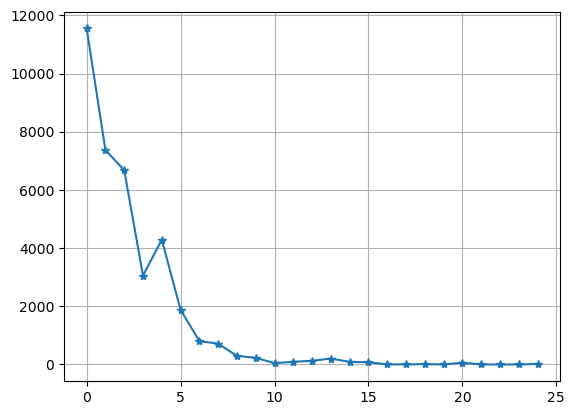

In [58]:
plt.plot(loss_vec, marker='*')
plt.grid()

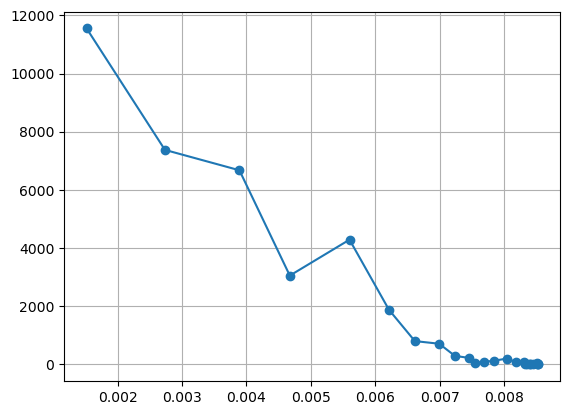

In [68]:
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.grid()

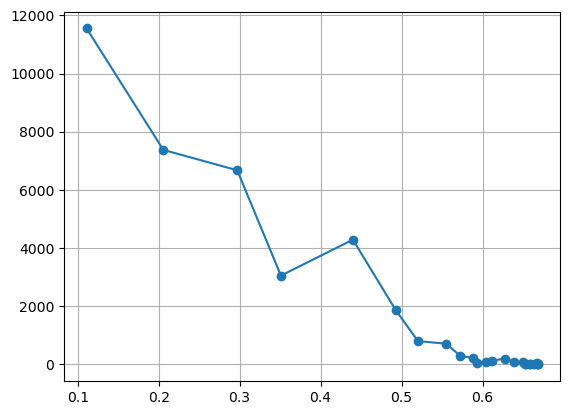

In [69]:
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.grid()

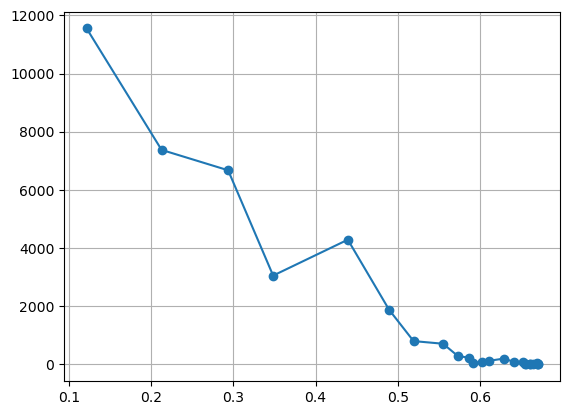

In [70]:
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.grid()

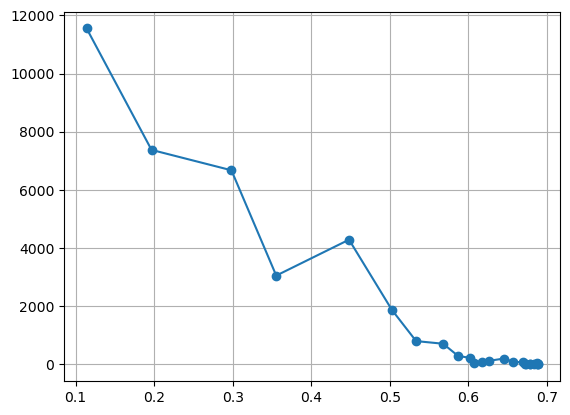

In [71]:
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.grid()

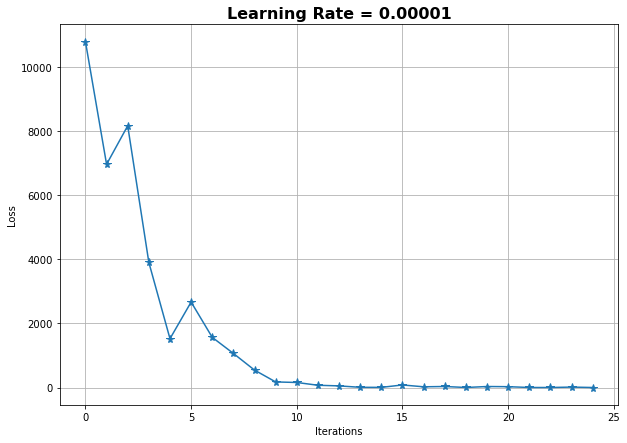

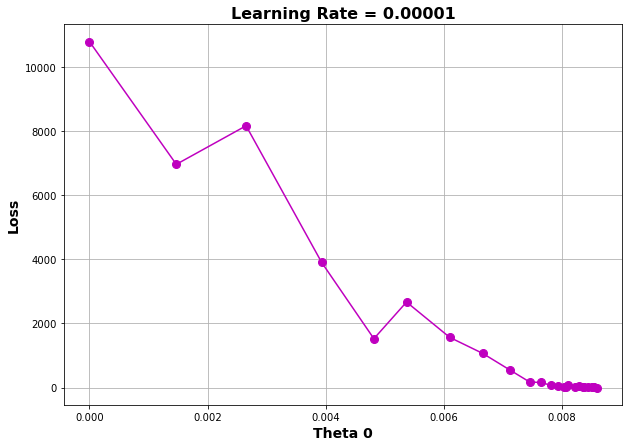

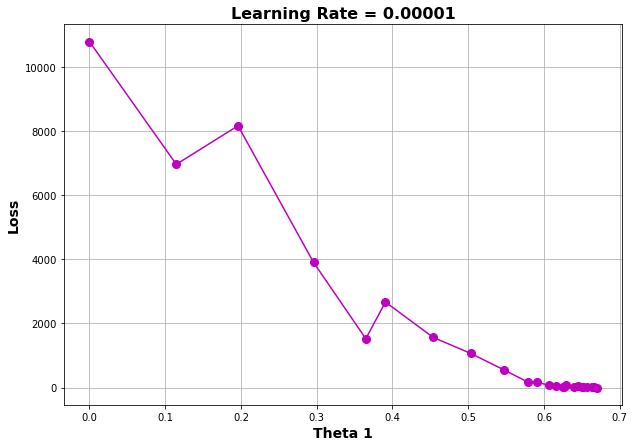

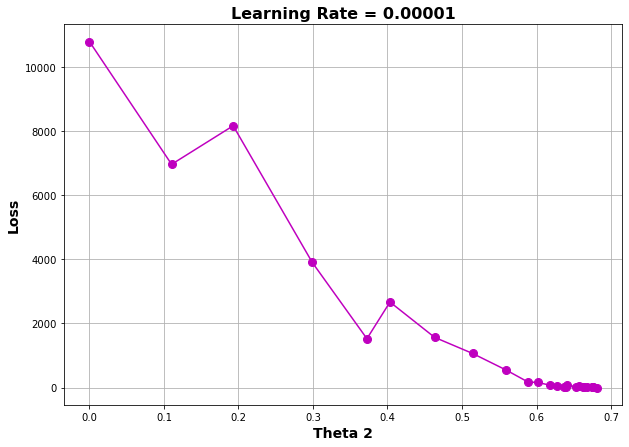

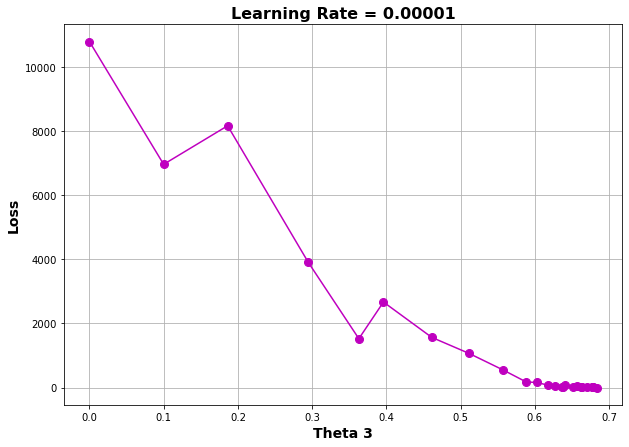

### Step 9: Make outer loop to perform as many epochs as you need to reach the stop conditions
### Remember the following:

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for stochastic GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

##### The following results uses the hyper-parameters alpha = 0.00001, max. epochs = 10000, gradient check=0.1, and cost convergence check=0.001

In [83]:
thetas = np.zeros(X.shape[1])
alpha=0.00001
loss_vec=[]
thetas_vec=[]
c=0
prev_loss = 0
for epoch in range(10000):
    for i in range(m):
            h=x_sh[i]@thetas
            e=h-y_sh[i]
            j=e**2/2
            loss_vec.append(j)
            grad=e*x_sh[i]
            thetas-=alpha*grad
            thetas_vec.append(thetas.copy())
            if i > 0 and abs(j - prev_loss) < 0.001:
                c=1
                break
            if (np.linalg.norm(grad)<0.1):
                c=1
                break

            prev_loss = j
    if c==1:
        break
print(f"j = {j}\n")
print(f"Gradient vector : {grad}\n")
print(f"Gradient norm : {np.linalg.norm(grad)}\n")
print(f"New thetas : {thetas}\n")

j = 1.1764661308656508

Gradient vector : [  1.53392707 142.65521768 134.98558232 142.65521768]

Gradient norm : 242.74365621069686

New thetas : [0.00893725 0.62096328 0.62747046 0.78681574]



****************** Epoch 0 ********************

j = 0.24204037135034231

Gradient Vector:
[ 0.69575911 48.70313788 45.22434232 51.48617433]

Gradient Vector Norm:
84.07465138146812

New Thetas : [0.00858371 0.66962122 0.6807672  0.68329489]

****************** Epoch 1 ********************

j = 0.9472218676718938

Gradient Vector:
[  1.37638793  96.34715514  89.46521549 101.85270686]

Gradient Vector Norm:
166.32097709997373

New Thetas : [0.00862376 0.67185715 0.68264611 0.68872658]

****************** Epoch 2 ********************

j = 0.961873755509241

Gradient Vector:
[  1.38699225  97.08945774  90.15449647 102.63742675]

Gradient Vector Norm:
167.60239006616783

New Thetas : [0.00862234 0.67091965 0.68134392 0.69090053]

****************** Epoch 3 ********************

j = 0.9727691998645135

Gradient Vector:
[  1.39482558  97.63779063  90.66366273 103.21709295]

Gradient Vector Norm:
168.54895939412754

New Thetas : [0.00862067 0.66997263 0.68003761 0.69304968]

*****************


Gradient Vector Norm:
278.93030165344163

New Thetas : [0.00624045 0.51384528 0.52792555 0.98672587]

****************** Epoch 250 ********************

j = 2.667031307195032

Gradient Vector:
[  2.30955897 161.66912757 150.12133275 170.90736344]

Gradient Vector Norm:
279.08418496096067

New Thetas : [0.00622564 0.51344272 0.52771521 0.98730884]

****************** Epoch 251 ********************

j = 2.6699487106726143

Gradient Vector:
[  2.31082181 161.75752645 150.20341742 171.00081368]

Gradient Vector Norm:
279.23678508836014

New Thetas : [0.0062108  0.51304152 0.52750665 0.98788882]

****************** Epoch 252 ********************

j = 2.6728433229046606

Gradient Vector:
[  2.3120741  161.84518703 150.28481653 171.09348343]

Gradient Vector Norm:
279.38811070284953

New Thetas : [0.00619593 0.51264168 0.52729984 0.98846582]

****************** Epoch 253 ********************

j = 2.6757152691551895

Gradient Vector:
[  2.31331592 161.93211429 150.3655347  171.18537796]

Grad

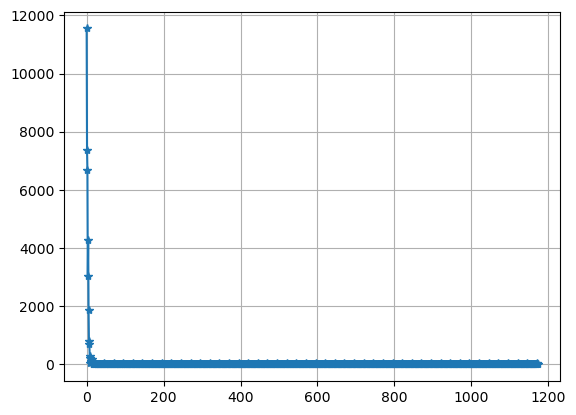

In [79]:
plt.plot(loss_vec, marker='*')
plt.grid()

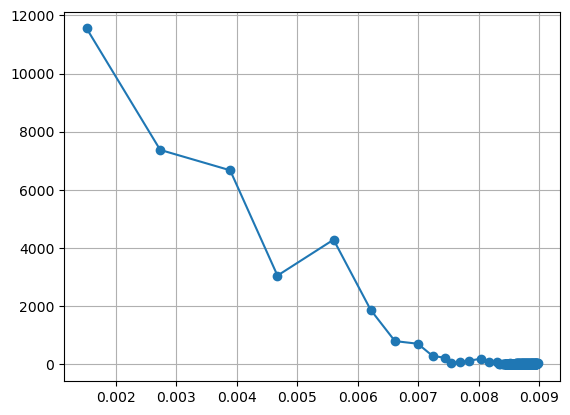

In [84]:
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.grid()

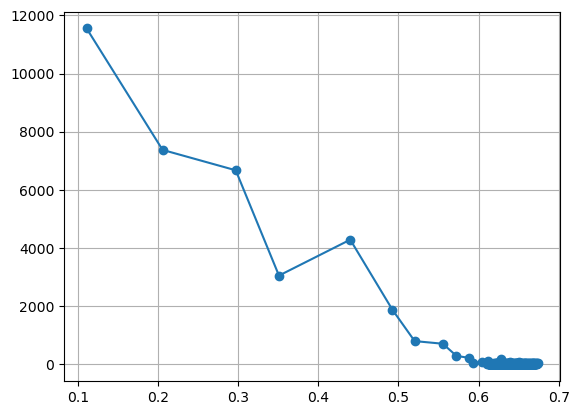

In [85]:
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.grid()

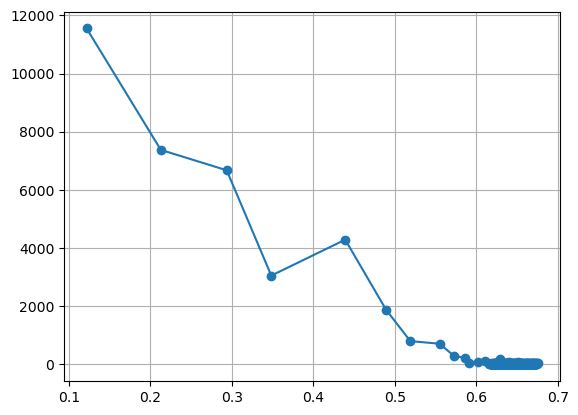

In [86]:
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.grid()

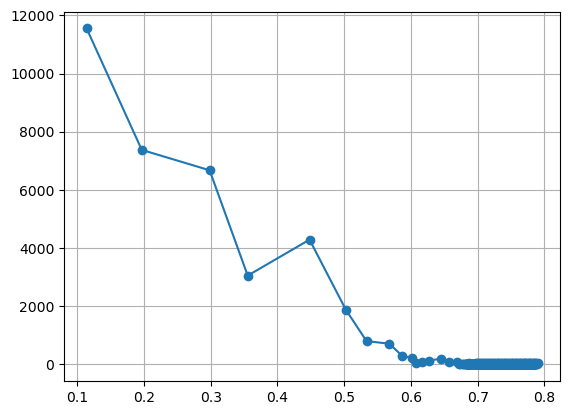

In [87]:
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.grid()

r squared: 0.9873565654534185


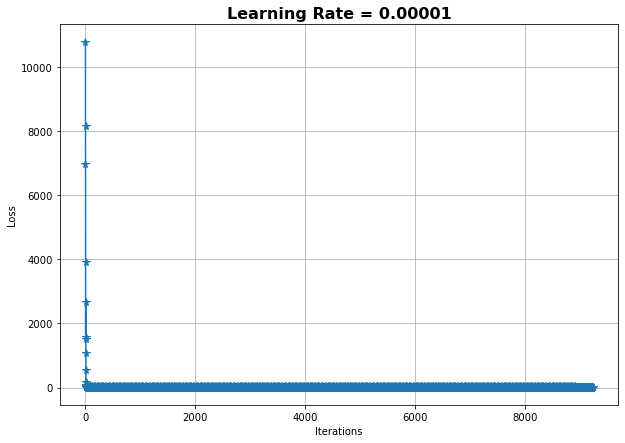

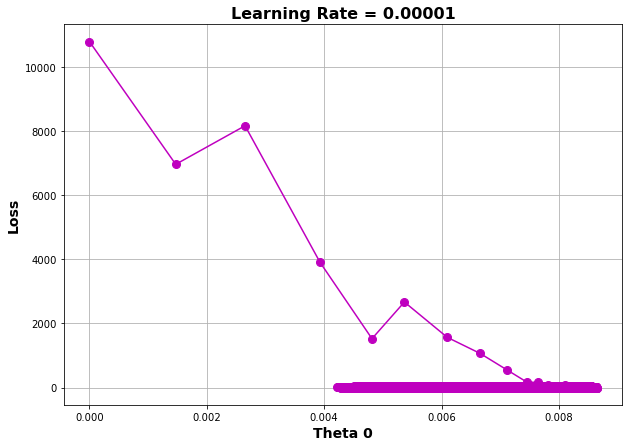

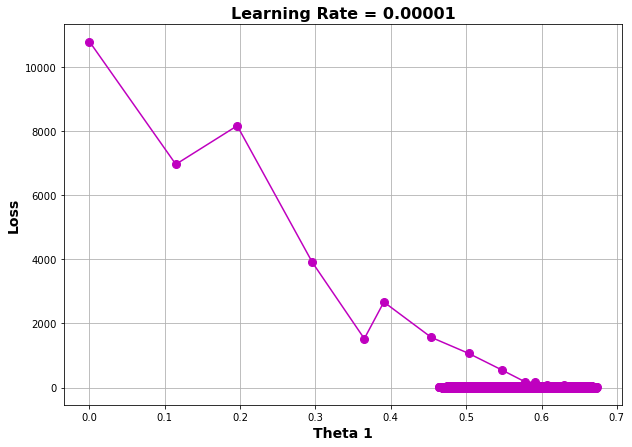

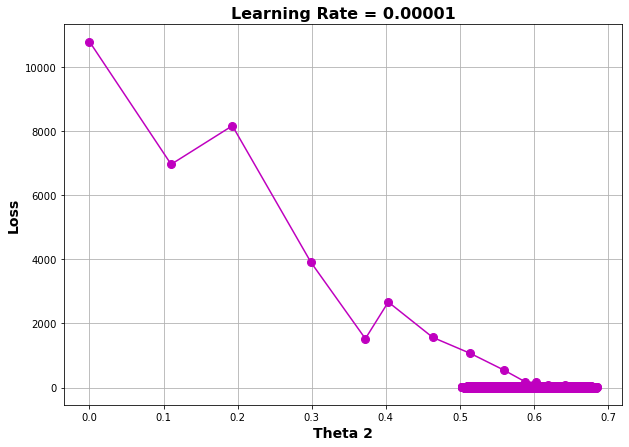

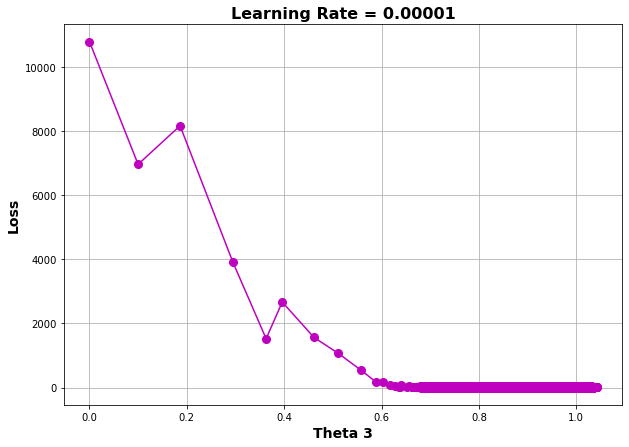